# Fashion MNIST dataset

In [1]:
# Importing libraries
import tensorflow as tf
import pandas as pd
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

C:\Users\raksh\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Understanding the dataset and Pre-processing

In [2]:
#Loading data
data=fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 1us/step


In [3]:
#Splitting the data into train and test
(X_train,y_train),(X_test,y_test)=data

### Displaying the number of classes 

In [4]:
len(np.unique(y_train))

10

### Displaying the dimensions of each image

In [5]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (60000, 28, 28)
Shape of X_test:  (10000, 28, 28)
Shape of y_train:  (60000,)
Shape of y_test:  (10000,)


### Displaying one image from each class

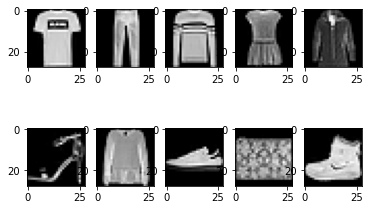

In [6]:
for i in range(0,10):
    plt.subplot(2,5,i+1)
    index=y_train.tolist().index(i)
    plt.imshow(X_train[index],cmap="gray")

### Normalization

In [7]:
X_train=X_train/255.0
X_test=X_test/255.0

## Performing experiments on Fully Connected Neural Networks (FCNN):

### Designing a FCNN for the dataset

In [8]:
# Creating a model
model=Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28], name="input_layer"))
model.add(Dense(300, activation='relu', name='hidden1'))
model.add(Dense(100, activation='relu', name="hidden2"))
model.add(Dense(10, activation='softmax', name="output_layer"))                               

In [9]:
# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Flatten)       (None, 784)               0         
                                                                 
 hidden1 (Dense)             (None, 300)               235500    
                                                                 
 hidden2 (Dense)             (None, 100)               30100     
                                                                 
 output_layer (Dense)        (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam" ,metrics=["accuracy"])

### Training the network

In [11]:
# Fitting the model
epochs=20
batch_size=32
history=model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 12s 6ms/step - loss: 0.4858 - accuracy: 0.8254 - val_loss: 0.3761 - val_accuracy: 0.8632
Epoch 2/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3647 - accuracy: 0.8654 - val_loss: 0.3763 - val_accuracy: 0.8635
Epoch 3/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3276 - accuracy: 0.8791 - val_loss: 0.3434 - val_accuracy: 0.8747
Epoch 4/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3035 - accuracy: 0.8880 - val_loss: 0.3340 - val_accuracy: 0.8725
Epoch 5/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2845 - accuracy: 0.8936 - val_loss: 0.3401 - val_accuracy: 0.8758
Epoch 6/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2696 - accuracy: 0.8991 - val_loss: 0.3446 - val_accuracy: 0.8783
Epoch 7/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.2581 - accuracy: 0.9022 - val_loss: 0.3337 - val_ac

### Performance curves

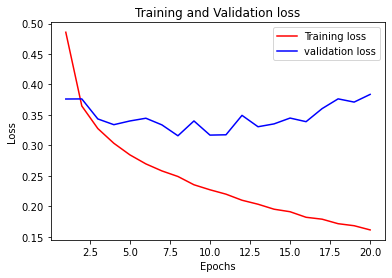

In [12]:
# Loss vs Epochs curve
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

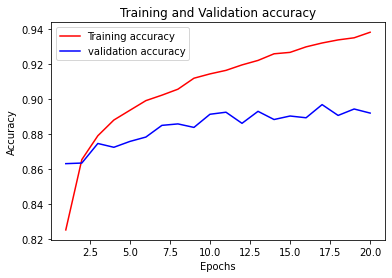

In [13]:
# Accuracy vs Epochs curve
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs, acc_train, 'r', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Performing experiments on a Convolution Neural Networks (CNNs):

### Designing CNN-1 which contains:
### One convolution layer which uses 32 kernels each of size 5x5, stride=1 and padding=0.
### One pooling layer which uses MAXPOOLING with stride=2.
### One hidden layer having number of neurons=100

In [15]:
# Creating the first CNN model
cnn1=Sequential()
cnn1.add(keras.Input(shape=(28,28,1)))
cnn1.add(keras.layers.Conv2D(32,kernel_size=(5,5),strides=1, activation='relu', padding='valid'))
cnn1.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
cnn1.add(keras.layers.Flatten())
cnn1.add(keras.layers.Dense(100, activation='relu'))
cnn1.add(Dense(10,activation='softmax'))

In [16]:
# Summary of the model
cnn1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 100)               460900    
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 462742 (1.77 MB)
Trainable params: 462742 (1.77 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [17]:
# Compiling the model
cnn1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [18]:
# Fitting the model
epochs=10
batch_size=32
history1=cnn1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 30s 17ms/step - loss: 0.4260 - accuracy: 0.8477 - val_loss: 0.3164 - val_accuracy: 0.8932
Epoch 2/10
1688/1688 [==============================] - 29s 17ms/step - loss: 0.2898 - accuracy: 0.8949 - val_loss: 0.2911 - val_accuracy: 0.8983
Epoch 3/10
1688/1688 [==============================] - 28s 17ms/step - loss: 0.2445 - accuracy: 0.9099 - val_loss: 0.2678 - val_accuracy: 0.9025
Epoch 4/10
1688/1688 [==============================] - 28s 17ms/step - loss: 0.2131 - accuracy: 0.9217 - val_loss: 0.2576 - val_accuracy: 0.9067
Epoch 5/10
1688/1688 [==============================] - 28s 17ms/step - loss: 0.1847 - accuracy: 0.9305 - val_loss: 0.2658 - val_accuracy: 0.9058
Epoch 6/10
1688/1688 [==============================] - 28s 17ms/step - loss: 0.1607 - accuracy: 0.9400 - val_loss: 0.2840 - val_accuracy: 0.9028
Epoch 7/10
1688/1688 [==============================] - 28s 17ms/step - loss: 0.1421 - accuracy: 0.9469 - val_loss: 0.2588 -

### Performance curves

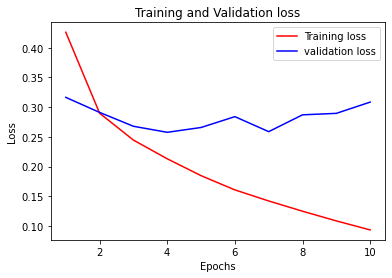

In [19]:
# Loss vs Epochs curve
loss_train = history1.history['loss']
loss_val = history1.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

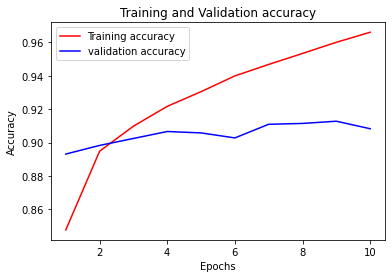

In [20]:
# Accuracy vs Epochs curve
acc_train = history1.history['accuracy']
acc_val = history1.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'r', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Designing CNN-2 which contains:
### Two back-to-back Convolution layers which uses 32 kernels each of size 3x3, stride=1 and padding =0.
### One pooling layer which uses MAXPOOLING with stride=2.
### One hidden layer having number of neurons =100

In [21]:
# Creating the second CNN model
cnn2=Sequential()
cnn2.add(keras.Input(shape=(28,28,1)))
cnn2.add(keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1), activation='relu', padding='valid'))
cnn2.add(keras.layers.Conv2D(32,kernel_size=(3,3),strides=(1,1), activation='relu', padding='valid'))
cnn2.add(keras.layers.MaxPooling2D(strides=(2,2)))
cnn2.add(keras.layers.Flatten())
cnn2.add(keras.layers.Dense(100, activation='relu'))
cnn2.add(Dense(10,activation='softmax'))

In [22]:
# Summary of the model
cnn2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 4608)              0         
                                                                 
 dense_2 (Dense)             (None, 100)               460900    
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                      

In [23]:
# Compiling the model
cnn2.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=['accuracy'])

### Training the networks

In [24]:
# Fitting the model
epochs=10
batch_size=32
history2=cnn2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 60s 34ms/step - loss: 0.3925 - accuracy: 0.8593 - val_loss: 0.2819 - val_accuracy: 0.8965
Epoch 2/10
1688/1688 [==============================] - 73s 43ms/step - loss: 0.2502 - accuracy: 0.9087 - val_loss: 0.2502 - val_accuracy: 0.9060
Epoch 3/10
1688/1688 [==============================] - 58s 34ms/step - loss: 0.1990 - accuracy: 0.9267 - val_loss: 0.2341 - val_accuracy: 0.9125
Epoch 4/10
1688/1688 [==============================] - 56s 33ms/step - loss: 0.1582 - accuracy: 0.9411 - val_loss: 0.2138 - val_accuracy: 0.9222
Epoch 5/10
1688/1688 [==============================] - 56s 33ms/step - loss: 0.1246 - accuracy: 0.9532 - val_loss: 0.2389 - val_accuracy: 0.9157
Epoch 6/10
1688/1688 [==============================] - 57s 34ms/step - loss: 0.0987 - accuracy: 0.9636 - val_loss: 0.2633 - val_accuracy: 0.9192
Epoch 7/10
1688/1688 [==============================] - 59s 35ms/step - loss: 0.0754 - accuracy: 0.9726 - val_loss: 0.2638 -

### Performance curves

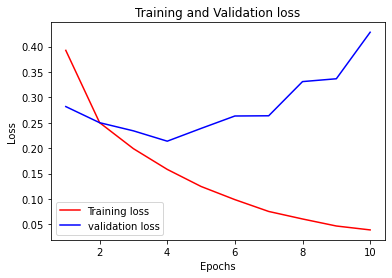

In [25]:
# Plotting the Loss vs Epochs curve
loss_train = history2.history['loss']
loss_val = history2.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

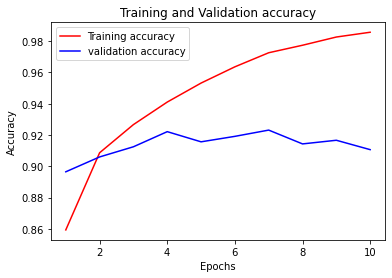

In [26]:
# Comparing the Accuracy vs Epochs curve
acc_train = history2.history['accuracy']
acc_val = history2.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'r', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Comparing the performances of CNN-1 and CNN-2

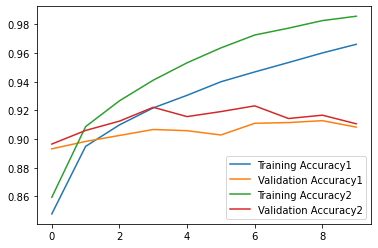

In [29]:
training_accuracy2 = history2.history['accuracy']
validation_accuracy2 = history2.history['val_accuracy']
training_accuracy1 = history1.history['accuracy']
validation_accuracy1 = history1.history['val_accuracy']
plt.plot(training_accuracy1, label='Training Accuracy1')
plt.plot(validation_accuracy1, label='Validation Accuracy1')
plt.plot(training_accuracy2, label='Training Accuracy2')
plt.plot(validation_accuracy2, label='Validation Accuracy2')
plt.legend()

In [33]:
# We can see from the above graph that the training as well as validation 
# accuracy of CNN2 is higher than that of CNN1

## Comparing the performances of FCNN and CNN

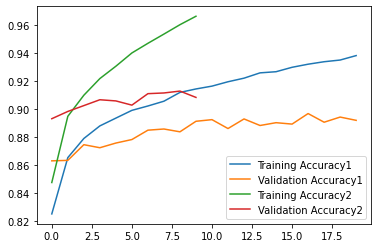

In [30]:
training_accuracy_fcnn = history.history['accuracy']
validation_accuracy_fcnn = history.history['val_accuracy']
training_accuracy_cnn1 = history1.history['accuracy']
validation_accuracy_cnn1 = history1.history['val_accuracy']
plt.plot(training_accuracy_fcnn, label='Training Accuracy1')
plt.plot(validation_accuracy_fcnn, label='Validation Accuracy1')
plt.plot(training_accuracy_cnn1, label='Training Accuracy2')
plt.plot(validation_accuracy_cnn1, label='Validation Accuracy2')
plt.legend()

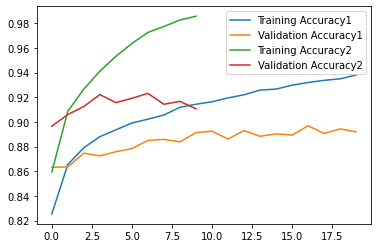

In [31]:
training_accuracy_fcnn = history.history['accuracy']
validation_accuracy_fcnn = history.history['val_accuracy']
training_accuracy_cnn2 = history2.history['accuracy']
validation_accuracy_cnn2 = history2.history['val_accuracy']
plt.plot(training_accuracy_fcnn, label='Training Accuracy1')
plt.plot(validation_accuracy_fcnn, label='Validation Accuracy1')
plt.plot(training_accuracy_cnn2, label='Training Accuracy2')
plt.plot(validation_accuracy_cnn2, label='Validation Accuracy2')
plt.legend()

In [34]:
# From the above two graphs we can say that the accuracy of CNN1 and CNN2 is higher than FCNN

## Comparing the number of parameters in the FCNN and the CNN

In [32]:
# The total number of parameters in FCNN are 266610
# The total number of parameters in CNN1 are 462742 and in CNN2 are 471478

## Computational efficiency of both networks

In [36]:
# When we compare the computational efficiency, we can say that CNN2 is better than CNN1 as
# the performance of CNN2 is better than CNN1.

In [35]:
# If the model has more number of parameters, it takes longer to train the model.
# So we can say that CNN2 took more time than CNN1.